# Subgraph modification
Two main methods of subgraph modification is implemented here: DBSCAN and enrichment and they should be performed after first going through the "Preprocessing" notebook.

DBSCAN is suited for networks with relatively high recosntruction qualities, as it iterates on the reconstructed positions to improve reconstruction quality.

Enrichment is best performed for highly filtered, sparse networks and does not require any previous reconstruction only an edgelist and edgelists from lower filtering thresholds. It can be performed on both bipartite or unipartite networks. - **not currently present in the notebook**

## DBSCAN iterative reconstruction
DBSCAN iterative reconstruction utilizes the reconstructed bead positions for beads sharing an edge with each cell individually.

By clustering the bead positions we can remove edges to bead not assigned to the largest cluster in the reconstruction, as a perfect, reconstructed spatial network should have no long-range edges removing these lessen compressive strain on the system, improving reconstruction significantly.

Before running the DBSCAN subgraph modification itself, some parameter optimization can be performed recommended to choose the min_sample that result in the largest amount of single-cluster cells. The eps value is assesable, but should be kept relatively low as to not assign beads to clusters that they are likely not part of.

If no optimization is desired, simply run the second cell and it will perform the DBSCAN clustering at default parameters (min_samples = 12 and eps = 5%) and reconstruct the processed network

In [ ]:
from Utils import *
config = ConfigLoader('config_subgraph_analysis.py')

from additional_subgraph_analysis import additional_subgraph_analysis
categories = ["analyse"] # analyse or position
plot_what = ["dbscan_calculation", "dbscan_analysis"]

additional_arguments = [range(5, 16)]
for cat in categories:
    for plotting_type in plot_what:
        additional_subgraph_analysis(config, category = cat, plotting_type = plotting_type, additional_arguments = additional_arguments)
plt.show()

In [ ]:
from Utils import *
from subgraph_modification_functions import perform_dbscan_gated_double_reconstruction

config = ConfigLoader("config_subgraph_modification.py")
perform_dbscan_gated_double_reconstruction(config)

Analyse the resulting network processing and second round reconstruction

In [ ]:
from Utils import *
from subgraph_analysis_functions import perform_analysis_actions
config = ConfigLoader('config_subgraph_analysis.py')
# Make sure the dbscan modifieda re included incase the config file does not have them included
config.subgraph_to_analyse.gating_threshold = "pseudo=False"
config.plot_modification = False
config.modification_type = "dbscan"

perform_analysis_actions(config)

# Enrichment

Enrichment entails taking highly filtered networks which have therefore separated into subgraphs of smaller regions of the full network and subsequently adding additional edges from lower filtering stringency networks and re-adding edges only between nodes in the separated regions.

It can be performed on any type of network, the only prerequisite being the prescence of lower filtering thresholds to incorporate new edges from. The default provided here is for the mouse embyronic dataset

In [ ]:
from Utils import *
from subgraph_modification_functions import perform_simple_subgraph_enriching

config = ConfigLoader("config_subgraph_+modification_mouse_embryo_uni.py")
perform_simple_subgraph_enriching(config)

Subgraph_edgelists/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7/subgraph_1_N=204_unw_enriched
Enriching subgraph_1_N=204_unw.csv from threshold 7
Subgraph_edgelists/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7/subgraph_2_N=286_unw_enriched
Enriching subgraph_2_N=286_unw.csv from threshold 7
Subgraph_edgelists/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7/subgraph_3_N=142_unw_enriched
Enriching subgraph_3_N=142_unw.csv from threshold 7
Subgraph_edgelists/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7/subgraph_4_N=149_unw_enriched
Enriching subgraph_4_N=149_unw.csv from threshold 7
input         Subgraph_edgelists/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7/subgraph_1_N=204_unw_enriched
info output   STRND_structure/mouse_embryo/run=only_spatial_cells_filters=numi2-256_nconn2-256_w1/uni-beads_7_2D/subgraph_1_N=204_unw

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                     7498   
average_degree                                           73.509804   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                     2815   
average_degree                                           27.598039   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                     1520   
average_degree                                           14.901961   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                     1084   
average_degree                                           10.627451   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                      813   
average_degree                                            7.970588   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2040 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     204   
num_edges                                                      651   
average_degree                                            6.382353   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=204_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
input         Subgraph_edgelists/mouse_emb

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                    12433   
average_degree                                           86.944056   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                     4018   
average_degree                                           28.097902   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                     2085   
average_degree                                            14.58042   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                     1424   
average_degree                                            9.958042   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                     1059   
average_degree                                            7.405594   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/2860 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     286   
num_edges                                                      789   
average_degree                                            5.517483   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=286_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
input         Subgraph_edgelists/mouse_emb

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                     3528   
average_degree                                           49.690141   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                     1398   
average_degree                                           19.690141   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                      804   
average_degree                                           11.323944   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                      558   
average_degree                                            7.859155   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                      432   
average_degree                                            6.084507   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1420 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     142   
num_edges                                                      332   
average_degree                                            4.676056   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=142_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
input         Subgraph_edgelists/mouse_emb

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                     4179   
average_degree                                            56.09396   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                     1722   
average_degree                                           23.114094   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                      993   
average_degree                                           13.328859   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                      696   
average_degree                                            9.342282   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                      541   
average_degree                                            7.261745   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  
Project structure created under 'c:\Users\

  0%|          | 0/1490 [00:00<?, ?it/s]

reconstruction done!
                                                             Value  \
Property                                                             
num_points                                                     149   
num_edges                                                      421   
average_degree                                            5.651007   
proximity_mode                                        experimental   
dimension                                                        2   
edge_list_title  edge_list_N=149_dim=2_experimental_edge_list_N...   
bipartiteness                                                False   

                       Category  
Property                         
num_points       Graph Property  
num_edges        Graph Property  
average_degree   Graph Property  
proximity_mode        Parameter  
dimension             Parameter  
edge_list_title       Parameter  
bipartiteness    Graph Property  


Analysing the resulting subgraphs after creation and reconstruction

Initializing files

Current Threshold:  7
Initializing files
Reading edgelist
Generating Subgraph object
Creating ground truth positions dataframe
check: Output_files\mouse_embryo\run=only_spatial_cells_filters=numi2-256_nconn2-256_w1\uni-beads_7_2D/full_reconstruction_summary_subgraph_1_N=204.csv
     node_ID           node_bc          node_type  type_prediction_score  \
0         17  AAACGAAAGAATTCAG        Endothelial                     -1   
1         67  AAAGGTAAGCGACATG        Endothelial                     -1   
2        106  AACAAGAGTCGGTAAG  White Blood Cells                     -1   
3        146  AACCACAGTTATTCTC          Neuron_13                     -1   
4        175  AACCTGAGTTCGTACA          Neuron_13                     -1   
..       ...               ...                ...                    ...   
199     8837  TTGGGTATCCCAATAG           Neuron_5                     -1   
200     8883  TTGTTGTCACGTCGGT          Neuron_13                     -1   
201     8937  TTT

KeyError: 'AAACGAAAGAATTCAG'

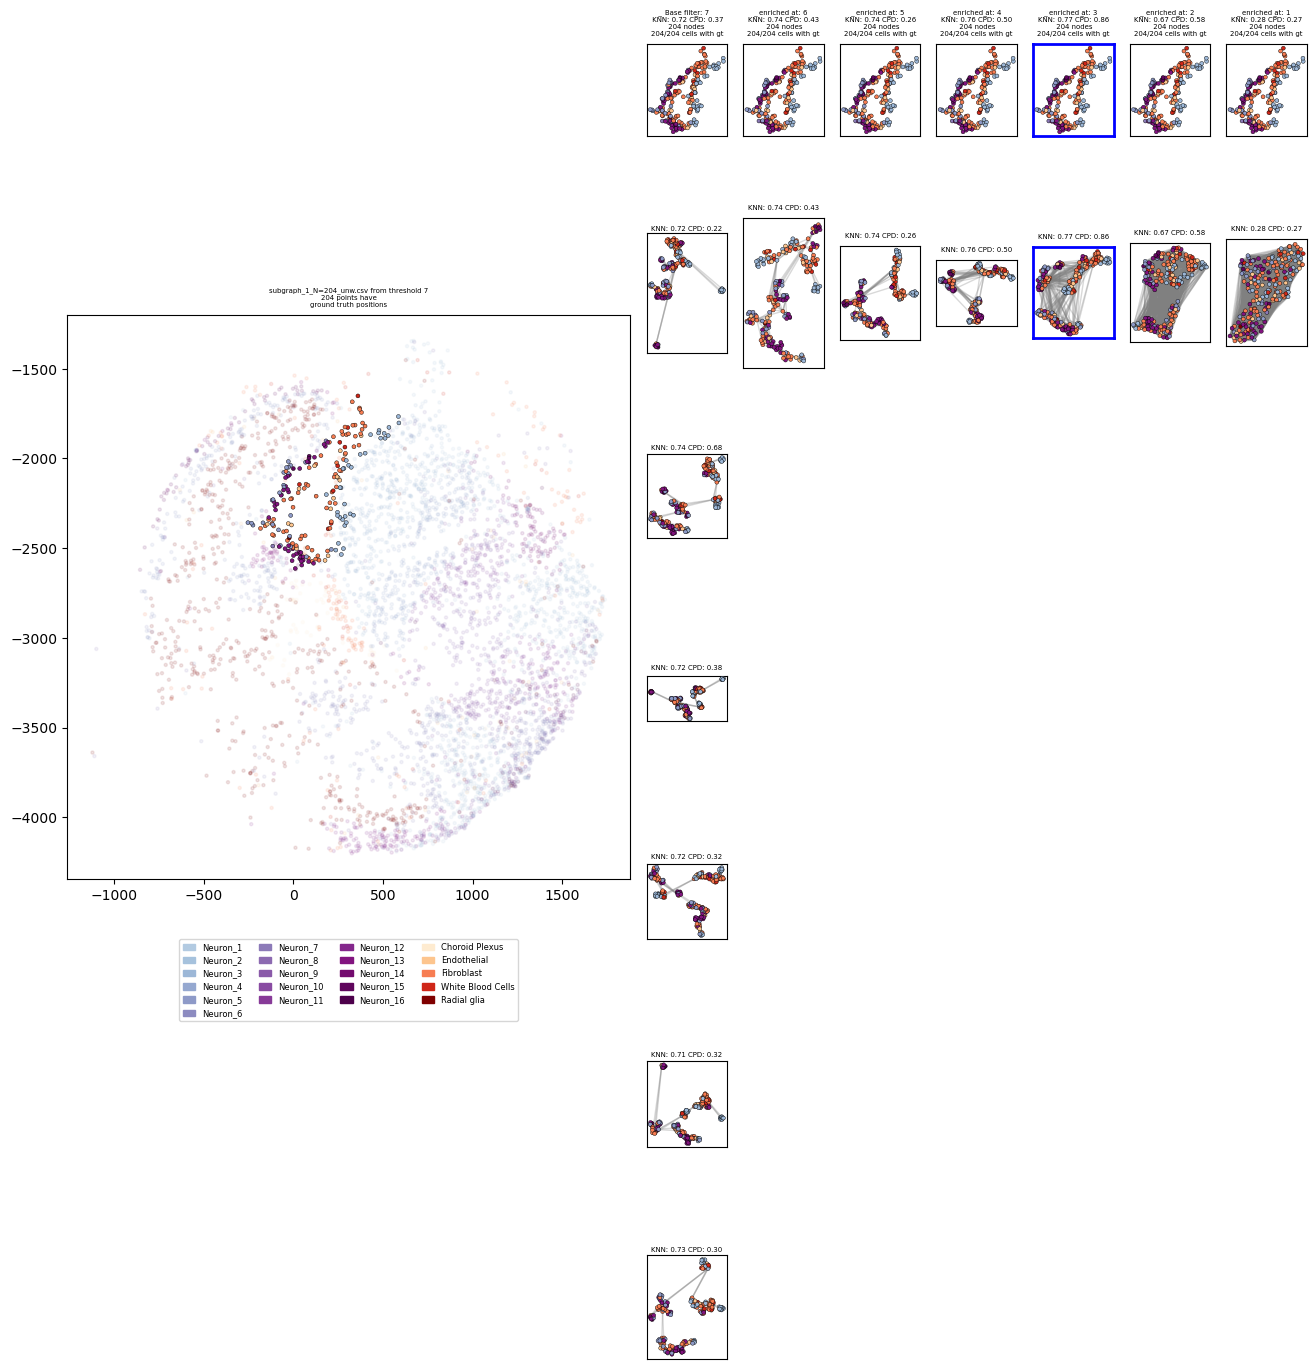

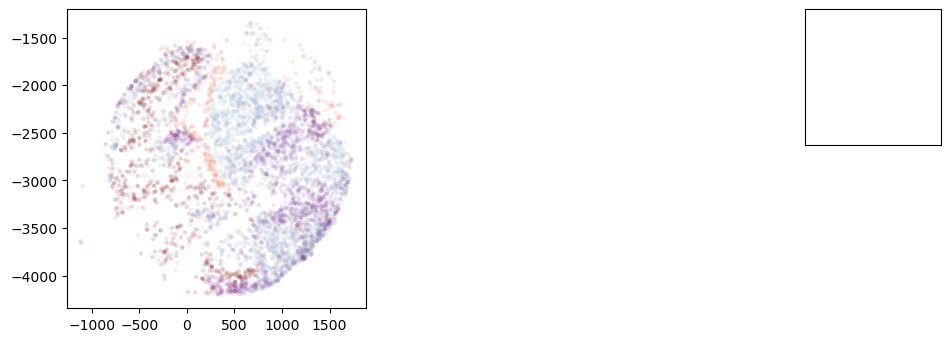

In [2]:
from Utils import *
from subgraph_analysis_functions import perform_analysis_actions
config = ConfigLoader('config_subgraph_analysis_mouse_embryo_uni.py')
# Make sure the enriched subgraphs are included incase the config file does not have them included
config.subgraph_to_analyse.gating_threshold = "all"
config.plot_modification = True
config.modification_type = "enriched"

perform_analysis_actions(config)